In [1]:
import lireDonnees
from classifieurs.modele_probabiliste import *
from tests import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
train = train.drop("id",axis=1)

test = pd.read_csv('data/test.csv')

le = LabelEncoder()
le.fit(train.species)

y = train.pop("species")
y = le.transform(y)

X = train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


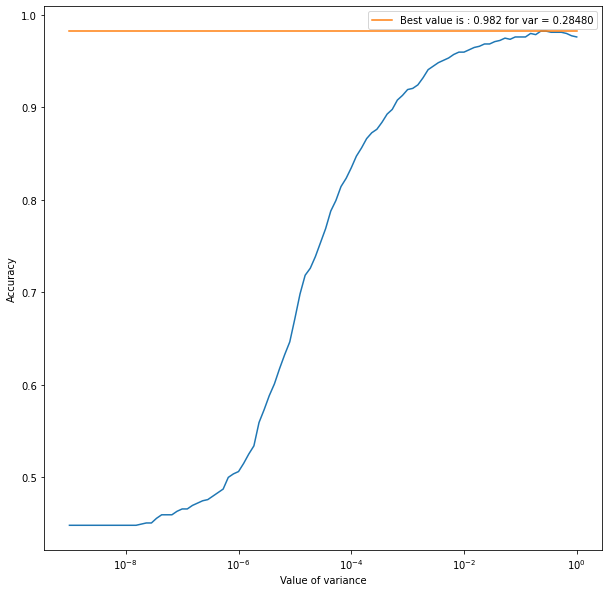

{'var_smoothing': 0.2848035868435802}


In [3]:
# create an instance of the GaussianNBClassifier class with a dictionary of hyperparameters to search over
gaussian_classifier = GaussianNB_Classifier({'var_smoothing': np.logspace(0, -9, num=100)})

# find the best hyperparameters for the classifier
gaussian_best_params = gaussian_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(gaussian_best_params)

In [4]:
gaussian_classifier = GaussianNB_Classifier()
gaussian_classifier.setParameter(gaussian_best_params)

gaussian_classifier.train(X_train,y_train)

y_pred = gaussian_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
gaussian_classifier.error(y_pred,y_test)

{'precision': 0.9747474747474747,
 'accuracy': 0.9747474747474747,
 'recall': 0.9747474747474747,
 'f1': 0.9747474747474747}

Fitting 5 folds for each of 7 candidates, totalling 35 fits


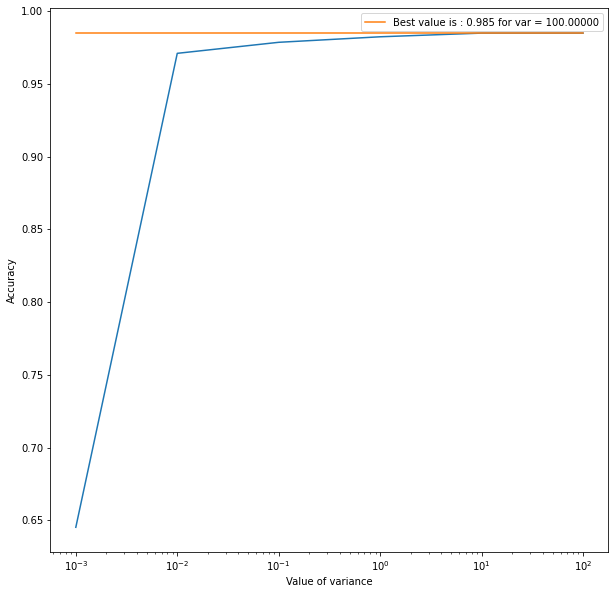

{'C': 100}


In [5]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
logistic_classifier = LogisticRegression_Classifier({"C":[100,50, 10, 1.0, 0.1, 0.01,0.001]})

# find the best hyperparameters for the classifier
logistic_best_params = logistic_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(logistic_best_params)

In [6]:
logistic_classifier = LogisticRegression_Classifier()
logistic_classifier.setParameter(logistic_best_params)

logistic_classifier.train(X_train,y_train)

y_pred = logistic_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
logistic_classifier.error(y_pred,y_test)

{'precision': 0.98989898989899,
 'accuracy': 0.98989898989899,
 'recall': 0.98989898989899,
 'f1': 0.98989898989899}

Fitting 5 folds for each of 8 candidates, totalling 40 fits


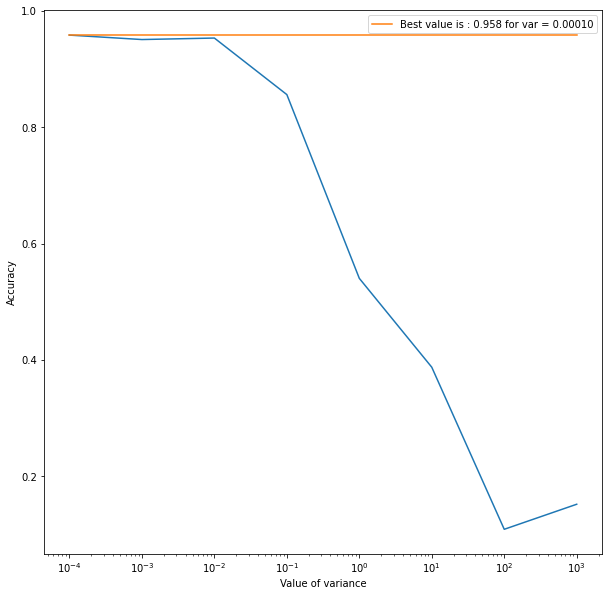

{'alpha': 0.0001}


In [7]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
svm_classifier = SVM_Classifier({"alpha":[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]})

# find the best hyperparameters for the classifier
svm_best_params = svm_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(svm_best_params)

In [8]:
svm_classifier = SVM_Classifier()
svm_classifier.setParameter(svm_best_params)

svm_classifier.train(X_train,y_train)

y_pred = svm_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
svm_classifier.error(y_pred,y_test)

{'precision': 0.9696969696969697,
 'accuracy': 0.9696969696969697,
 'recall': 0.9696969696969697,
 'f1': 0.9696969696969697}

Fitting 5 folds for each of 8 candidates, totalling 40 fits


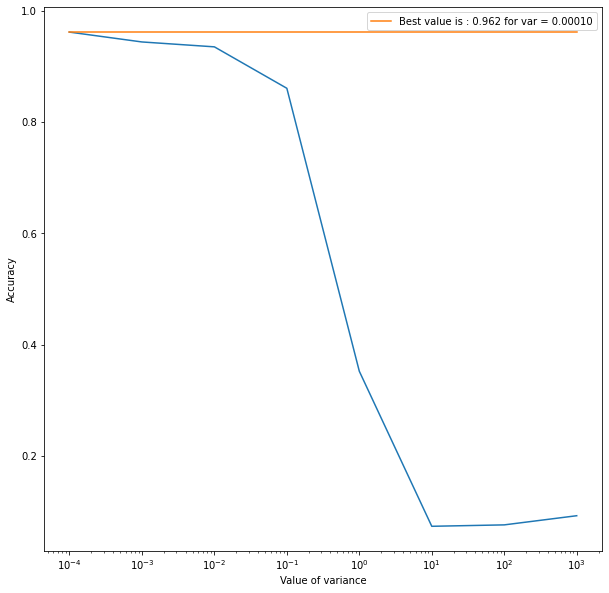

{'alpha': 0.0001}


In [9]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
perceptron_classifier = Perceptron_Classifier({"alpha":[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]})

# find the best hyperparameters for the classifier
perceptron_best_params = perceptron_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(perceptron_best_params)

In [10]:
perceptron_classifier = Perceptron_Classifier()
perceptron_classifier.setParameter(perceptron_best_params)

perceptron_classifier.train(X_train,y_train)

y_pred = perceptron_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
perceptron_classifier.error(y_pred,y_test)

{'precision': 0.9797979797979798,
 'accuracy': 0.9797979797979798,
 'recall': 0.9797979797979798,
 'f1': 0.9797979797979798}